C:\Users\Tijs De Belie\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


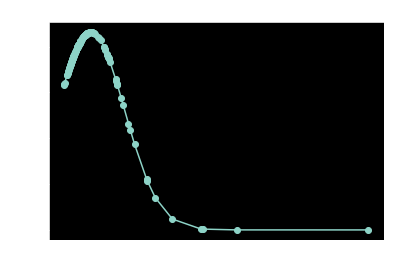

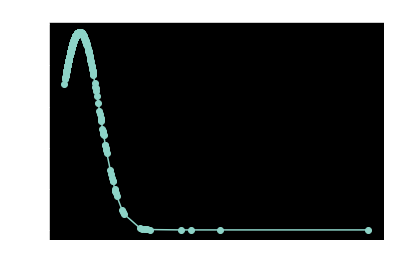

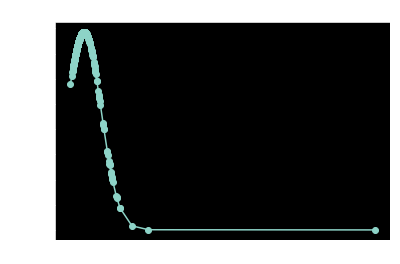

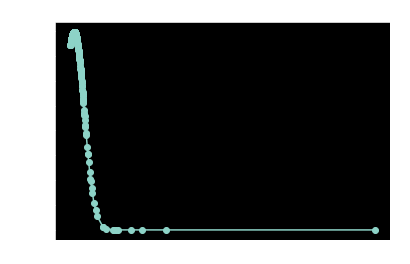

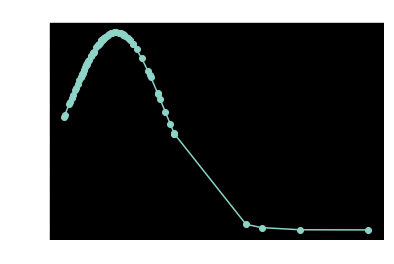

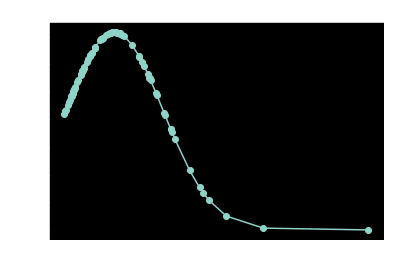

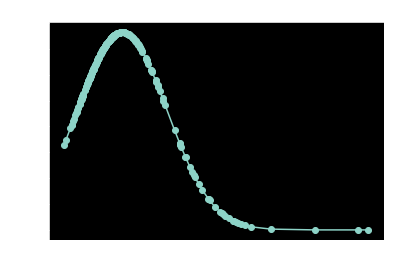

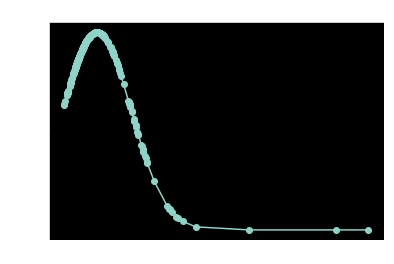

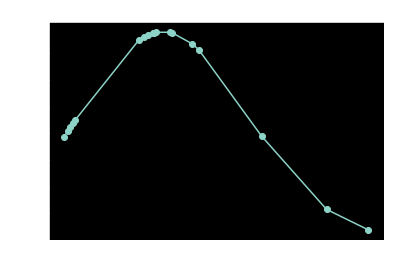

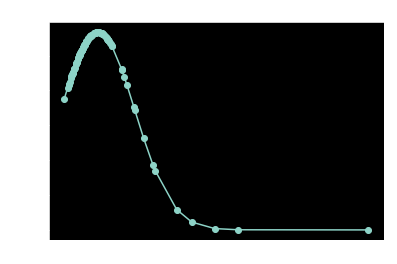

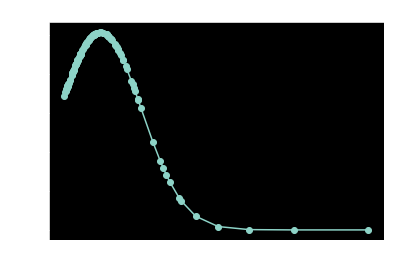

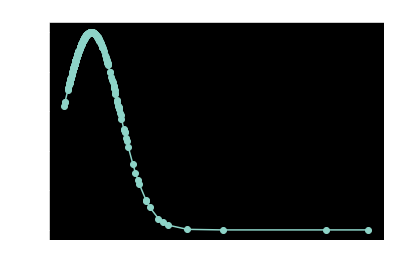

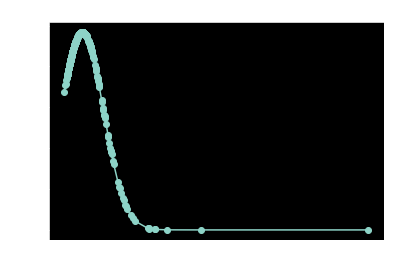

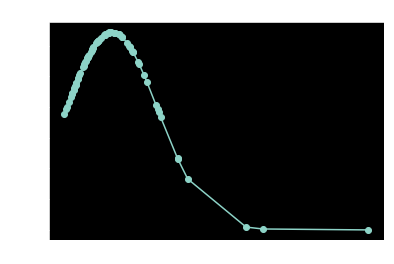

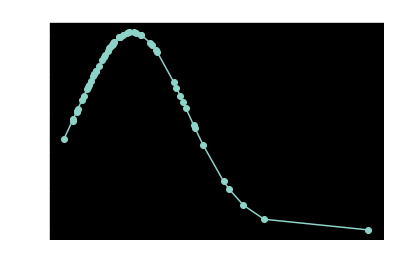

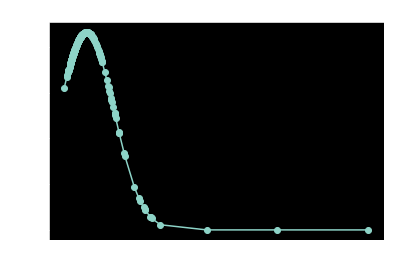

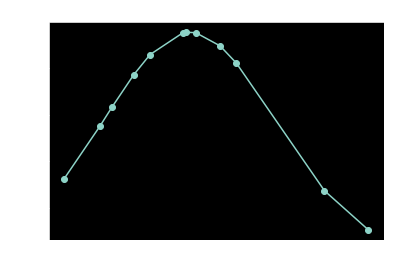

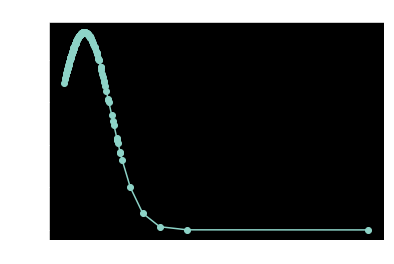

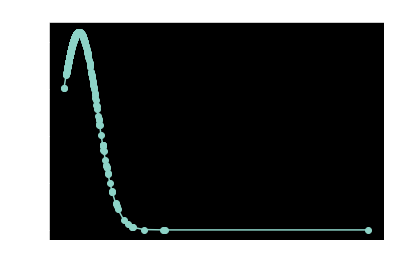

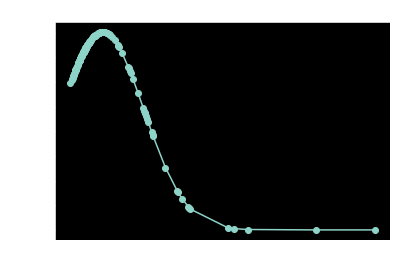

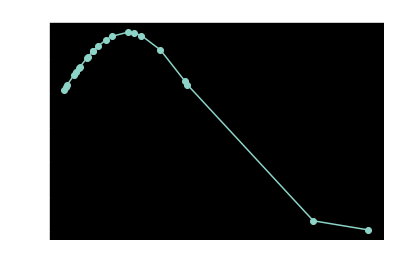

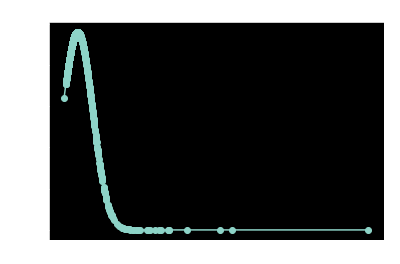

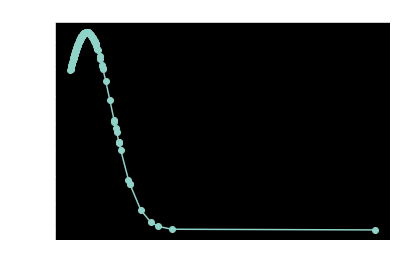

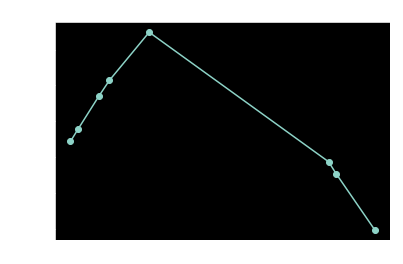

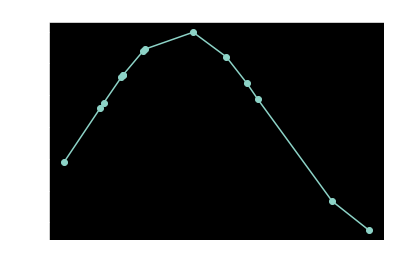

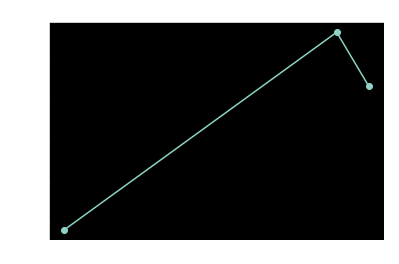

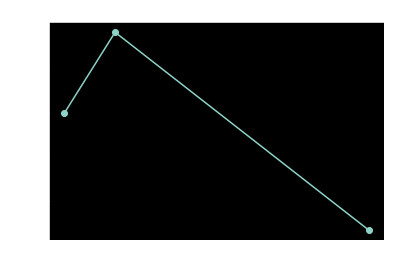

[925.0594755241545, 830.0992245615382, 1016.4524188383779, 2510.057493923411, 625.5152278701601, 557.246325490942, 522.305658169089, 688.8771295790451, 510.3937266197925, 703.4432861043578, 785.5141542854899, 797.450070822055, 825.0197024804734, 620.0214629471866, 392.37350261651915, 923.3205739797619, 418.90991971226146, 859.1703275125553, 947.2267019777656, 995.8922678357072, 690.8485978302097, 831.8173948081161, 1081.710820364785, 880.1184579362031, 283.4593517272497, 77.18952145351221, 224.79027262465488]


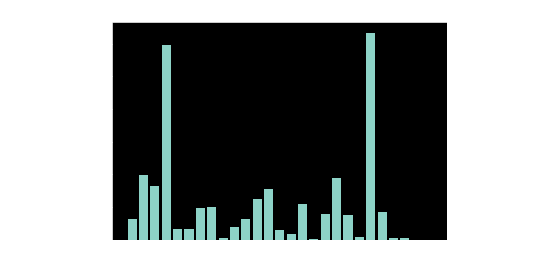

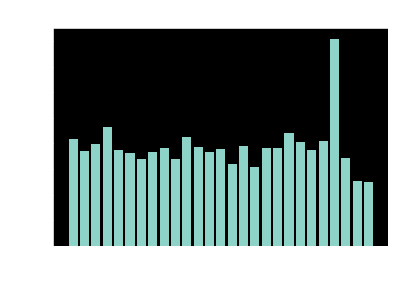

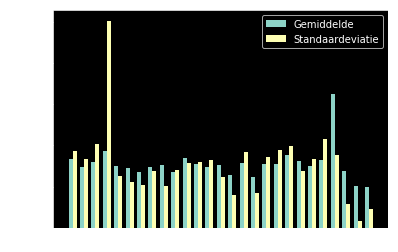

In [1]:
# %matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import re
import json


kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=naam,naamstemmen,verkozen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)
data = data["results"]

eindarray = list()

def search(letter):
       found = False
       for d in eindarray:
            if(letter in d.values()):
                return True
            else: 
                found = False
       return found

for x in data:
    if len(x["verkozen"]) >= 1:
        name = x["naam"][:1]
        if(search(name) == True):
            for y in eindarray:
                if(y["letter"] == name):
                    y["stemmen"].append(float(x["naamstemmen"]))
                    y["aantal"] +=1
                    
        else :
            thisdict = {
                "letter": name,
                "stemmen": [float(x["naamstemmen"])],
                "aantal" : 1,
                "std": 0
            }
            eindarray.append(thisdict)


eindarray = sorted(eindarray, key=lambda k: k['letter']) 
index = 0
for a in eindarray:
    plt.figure(index+1)
    a["std"] = np.std(a["stemmen"])
    
    a["stemmen"] = sorted(a["stemmen"])
    y = norm.pdf(a["stemmen"], np.mean(a["stemmen"]), a["std"])
    plt.plot(a["stemmen"],y, '-o')
    #plt.hist(a["stemmen"],density=True)
    plt.title(a["letter"])
    
    som = 0
    index +=1
    for x in a["stemmen"]:
        som += float(x)
    a["stemmen"] = som

plt.show()

x_as = list()
y_as = list()
aantal_as = list()
standaarddev = list()
for d in eindarray:
    x_as.append(str(d["letter"]))
    y_as.append(float(d["stemmen"]))
    aantal_as.append(d["aantal"])
    standaarddev.append(d["std"])

print(standaarddev)

gemiddelde = list()

i = 0
for e in y_as:
    gemiddelde.append(e/aantal_as[i])
    i+=1




plt.xlabel("Eerste letter achternaam")
plt.ylabel("Totaal aantal stemmen")
plt.title("Totaal aantal stemmen per eerste letter van de achternaam voor de verkozen kandidaten")
plt.bar(x_as, y_as)
plt.show()

plt.xlabel("Eerste letter achternaam")
plt.ylabel("Gemiddeld aantal stemmen per verkozen kandidaat")
plt.bar(x_as, gemiddelde)
plt.show()





ax = plt.subplot(111)


N = len(x_as)
ind = np.arange(N) 

width = 0.35 

plt.bar(ind, gemiddelde, width, label='Gemiddelde')
plt.bar(ind + width, standaarddev, width,
    label='Standaardeviatie')

plt.ylabel('Aantal stemmen')
plt.title('')
plt.xticks(ind + width / 2, x_as)

plt.legend(loc='best')
plt.show()

 


#Er is een verband tussen de eerste letter van de achternaam en het aantal stemmen voor de verkozen kandidaten
#Er is een verband tussen de eerste letter en het achternaam en het aantal stemmen dat nodig is om verkozen te geraken.

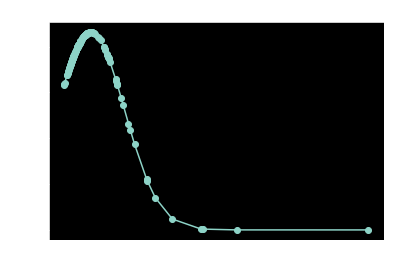

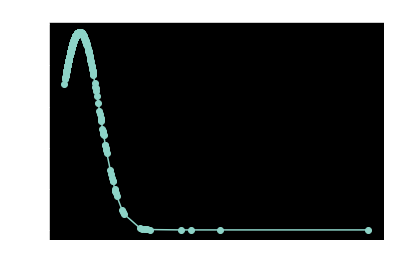

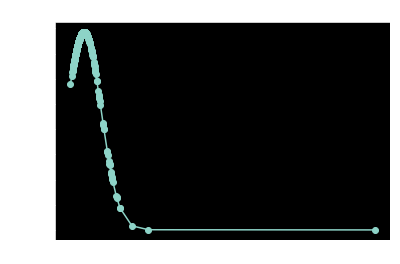

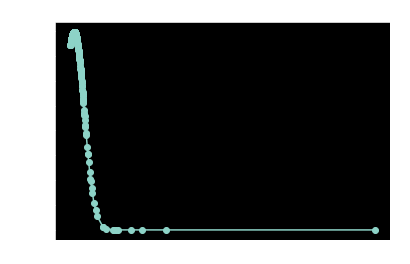

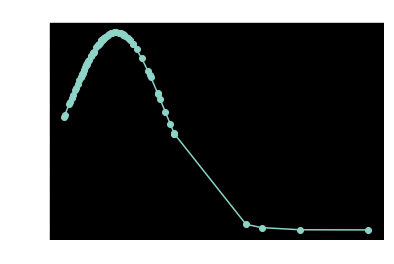

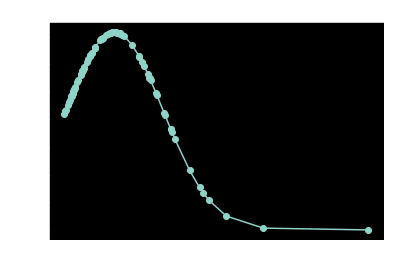

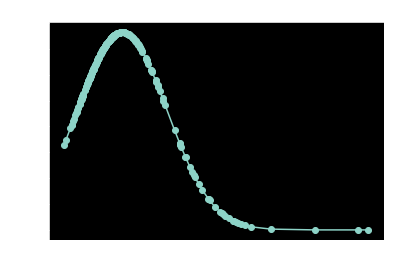

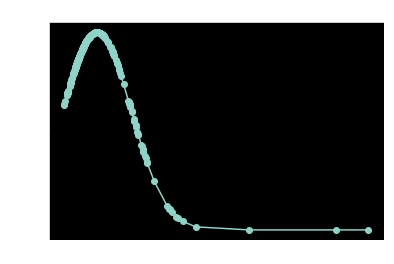

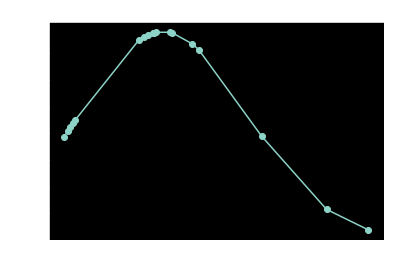

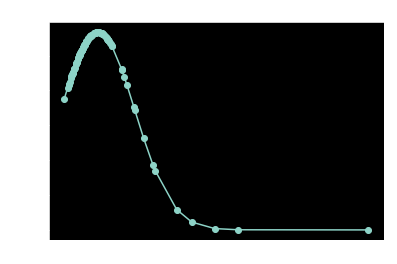

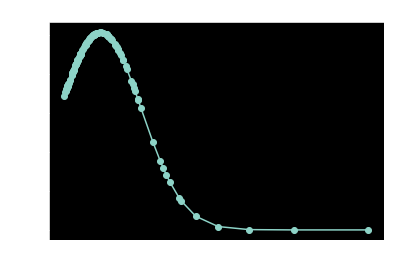

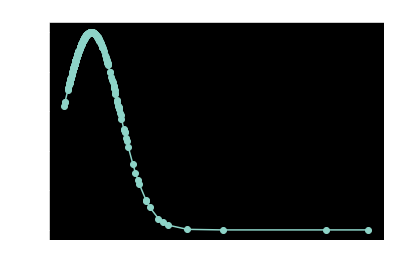

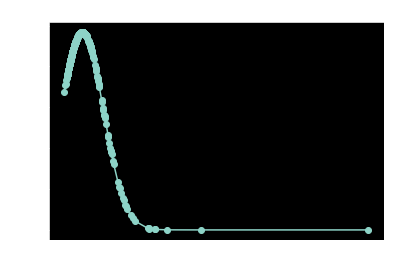

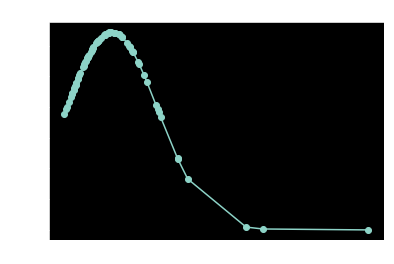

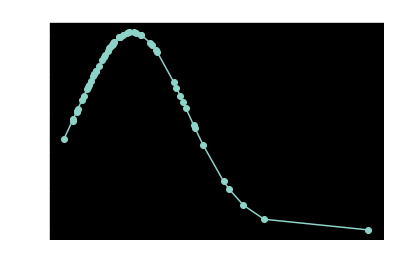

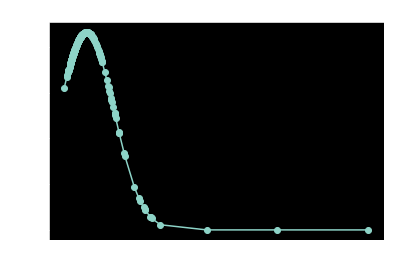

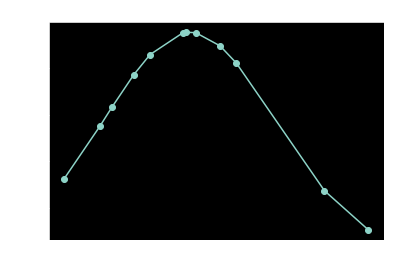

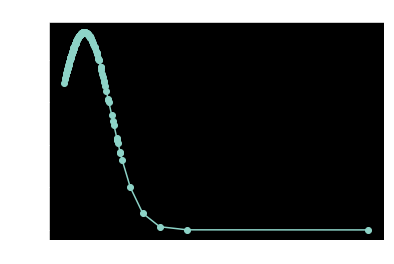

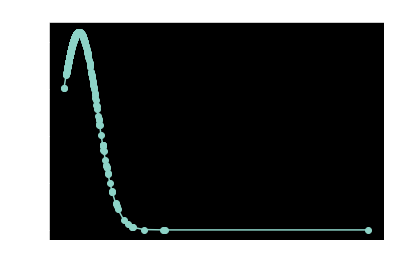

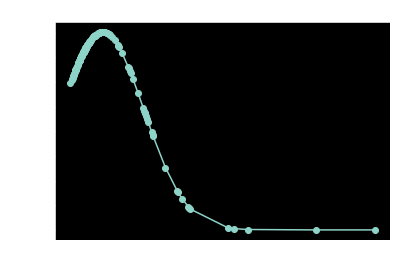

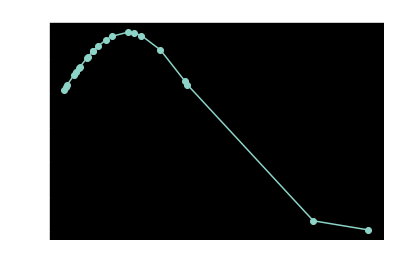

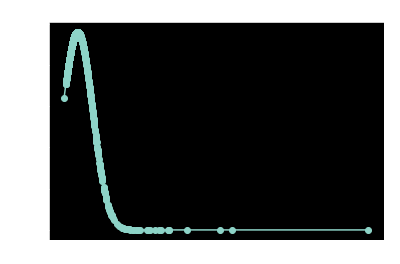

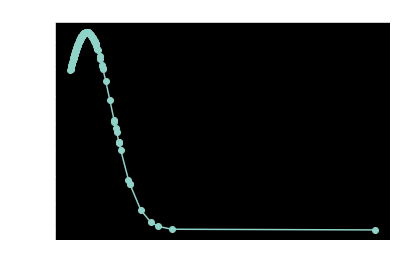

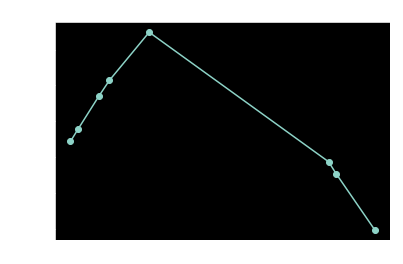

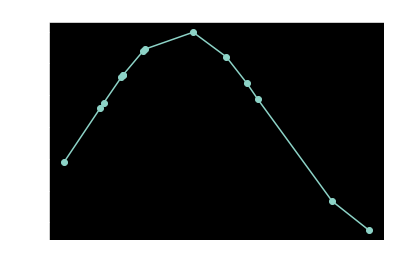

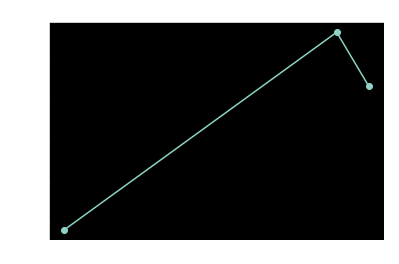

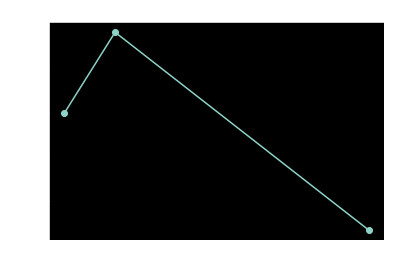

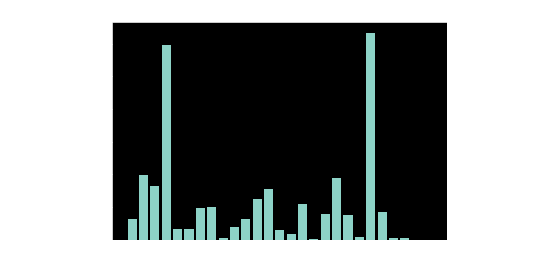

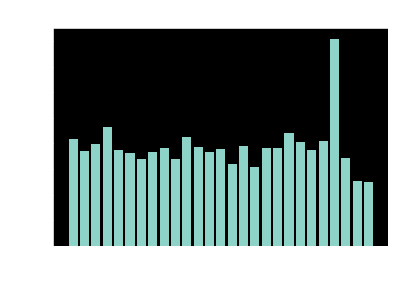

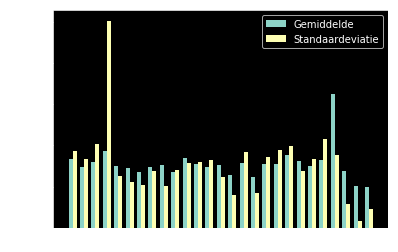

In [2]:
# %matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import re
import json


kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=naam,naamstemmen,verkozen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)
data = data["results"]

eindarray = list()

def search(letter):
       found = False
       for d in eindarray:
            if(letter in d.values()):
                return True
            else: 
                found = False
       return found

for x in data:
    if len(x["verkozen"]) >= 1:
        name = x["naam"][:1]
        if(search(name) == True):
            for y in eindarray:
                if(y["letter"] == name):
                    y["stemmen"].append(float(x["naamstemmen"]))
                    y["aantal"] +=1
                    
        else :
            thisdict = {
                "letter": name,
                "stemmen": [float(x["naamstemmen"])],
                "aantal" : 1,
                "std": 0
            }
            eindarray.append(thisdict)


eindarray = sorted(eindarray, key=lambda k: k['letter']) 
index = 0
for a in eindarray:
    plt.figure(index+1)
    a["std"] = np.std(a["stemmen"])
    
    a["stemmen"] = sorted(a["stemmen"])
    y = norm.pdf(a["stemmen"], np.mean(a["stemmen"]), a["std"])
    plt.plot(a["stemmen"],y, '-o')
    #plt.hist(a["stemmen"],density=True)
    plt.title(a["letter"])
    
    som = 0
    index +=1
    for x in a["stemmen"]:
        som += float(x)
    a["stemmen"] = som

plt.show()

x_as = list()
y_as = list()
aantal_as = list()
standaarddev = list()
for d in eindarray:
    x_as.append(str(d["letter"]))
    y_as.append(float(d["stemmen"]))
    aantal_as.append(d["aantal"])
    standaarddev.append(d["std"])


gemiddelde = list()

i = 0
for e in y_as:
    gemiddelde.append(e/aantal_as[i])
    i+=1




plt.xlabel("Eerste letter achternaam")
plt.ylabel("Totaal aantal stemmen")
plt.title("Totaal aantal stemmen per eerste letter van de achternaam voor de verkozen kandidaten")
plt.bar(x_as, y_as)
plt.show()

plt.xlabel("Eerste letter achternaam")
plt.ylabel("Gemiddeld aantal stemmen per verkozen kandidaat")
plt.bar(x_as, gemiddelde)
plt.show()





ax = plt.subplot(111)


N = len(x_as)
ind = np.arange(N) 

width = 0.35 

plt.bar(ind, gemiddelde, width, label='Gemiddelde')
plt.bar(ind + width, standaarddev, width,
    label='Standaardeviatie')

plt.ylabel('Aantal stemmen')
plt.title('')
plt.xticks(ind + width / 2, x_as)

plt.legend(loc='best')
plt.show()

 


#Er is een verband tussen de eerste letter van de achternaam en het aantal stemmen voor de verkozen kandidaten
#Er is een verband tussen de eerste letter en het achternaam en het aantal stemmen dat nodig is om verkozen te geraken.

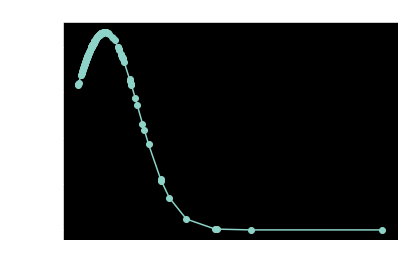

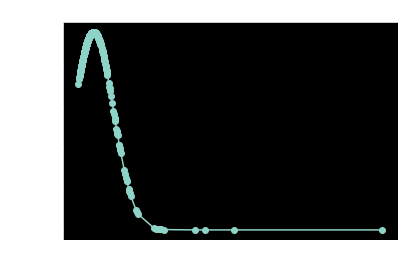

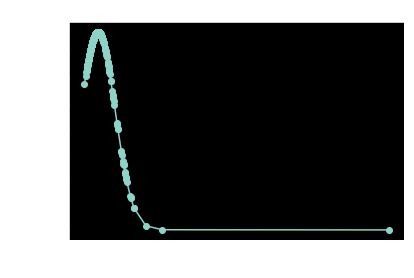

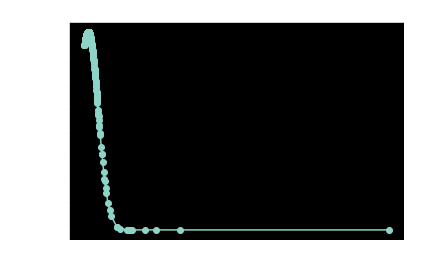

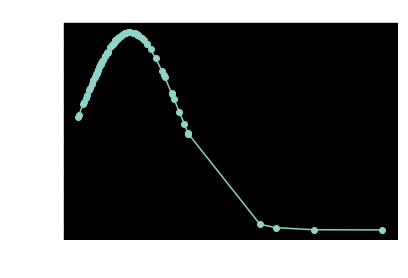

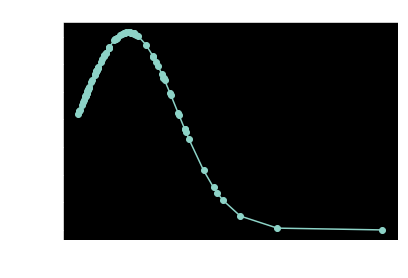

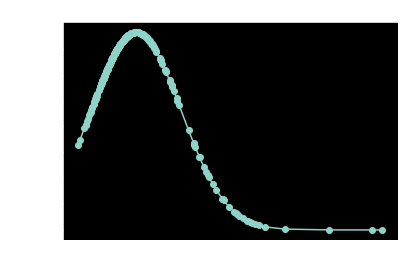

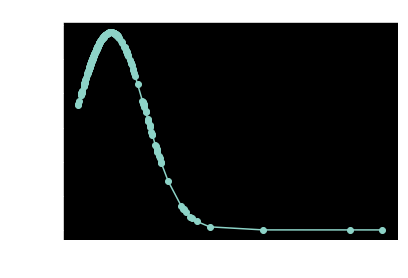

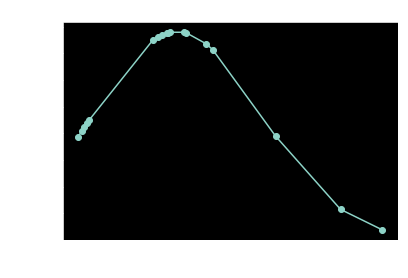

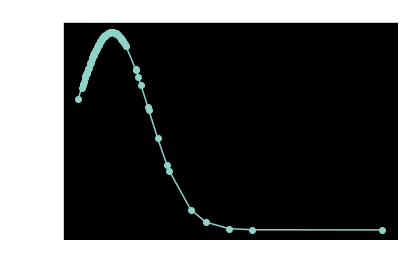

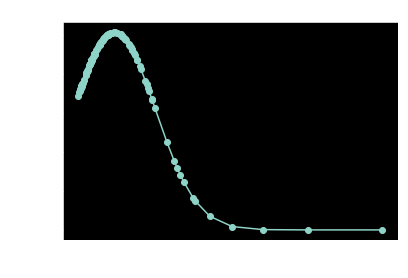

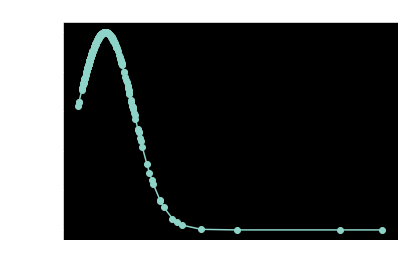

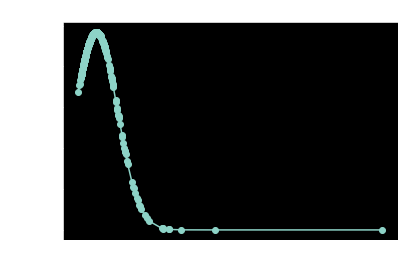

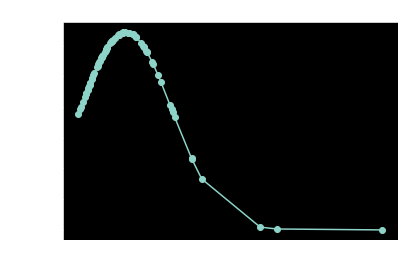

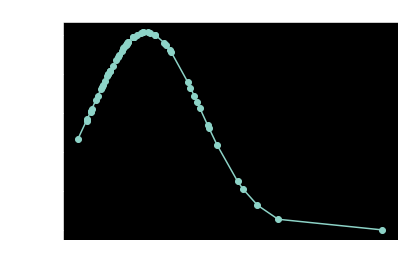

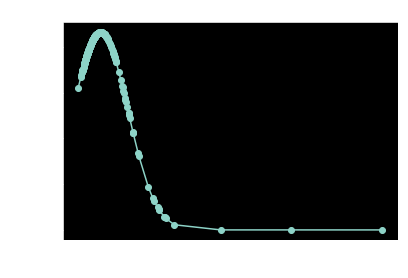

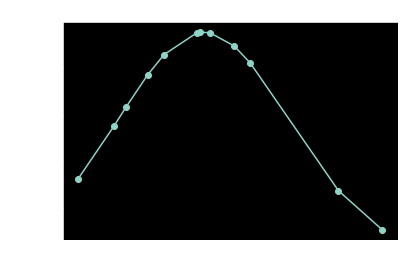

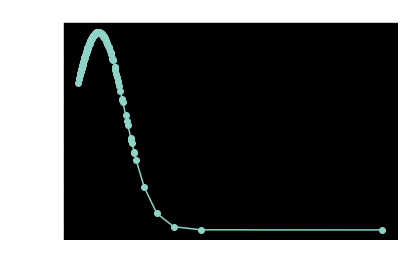

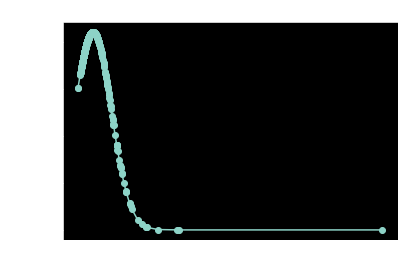

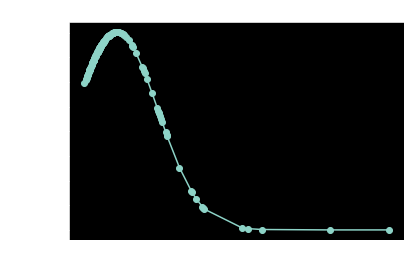

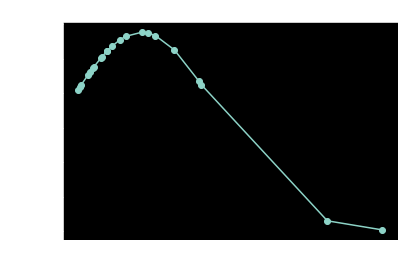

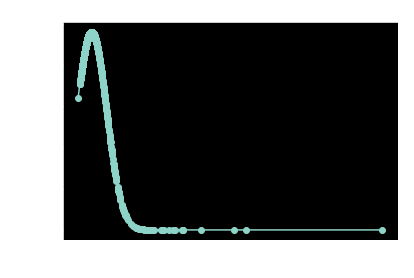

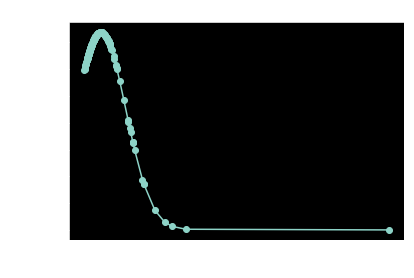

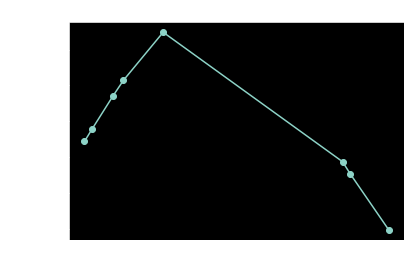

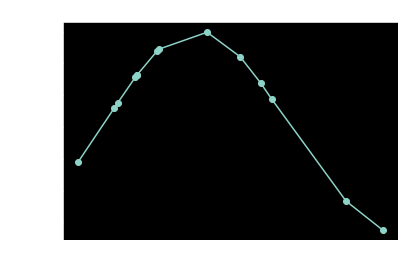

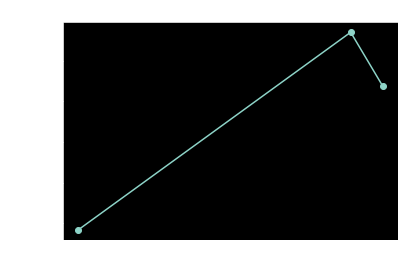

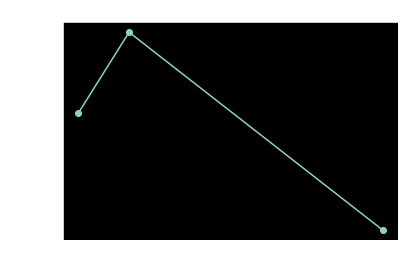

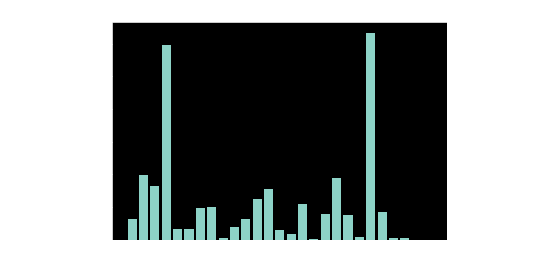

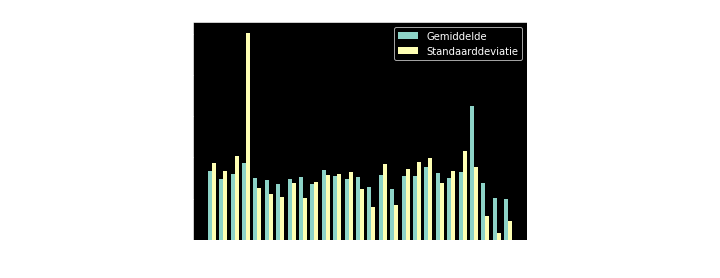

In [3]:
# %matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import re
import json


kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=naam,naamstemmen,verkozen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)
data = data["results"]

eindarray = list()

def search(letter):
       found = False
       for d in eindarray:
            if(letter in d.values()):
                return True
            else: 
                found = False
       return found

for x in data:
    if len(x["verkozen"]) >= 1:
        name = x["naam"][:1]
        if(search(name) == True):
            for y in eindarray:
                if(y["letter"] == name):
                    y["stemmen"].append(float(x["naamstemmen"]))
                    y["aantal"] +=1
                    
        else :
            thisdict = {
                "letter": name,
                "stemmen": [float(x["naamstemmen"])],
                "aantal" : 1,
                "std": 0
            }
            eindarray.append(thisdict)


eindarray = sorted(eindarray, key=lambda k: k['letter']) 
index = 0
for a in eindarray:
    plt.figure(index+1)
    a["std"] = np.std(a["stemmen"])
    
    a["stemmen"] = sorted(a["stemmen"])
    y = norm.pdf(a["stemmen"], np.mean(a["stemmen"]), a["std"])
    plt.plot(a["stemmen"],y, '-o')
    plt.xlabel("Aantal naamenstemmen voor de verkozen kandidaat")
    plt.ylabel("Kansdichtheid")

    plt.title("Gauss curve voor beginletter: " + a["letter"].lower() + " van de achternaam")
    
    som = 0
    index +=1
    for x in a["stemmen"]:
        som += float(x)
    a["stemmen"] = som

plt.show()

x_as = list()
y_as = list()
aantal_as = list()
standaarddev = list()
for d in eindarray:
    x_as.append(str(d["letter"]))
    y_as.append(float(d["stemmen"]))
    aantal_as.append(d["aantal"])
    standaarddev.append(d["std"])


gemiddelde = list()

i = 0
for e in y_as:
    gemiddelde.append(e/aantal_as[i])
    i+=1




plt.xlabel("Eerste letter achternaam")
plt.ylabel("Totaal aantal stemmen")
plt.title("Totaal aantal stemmen per eerste letter van de achternaam voor de verkozen kandidaten")
plt.bar(x_as, y_as)
plt.show()


ax = plt.subplot(111)
N = len(x_as)
ind = np.arange(N) 

width = 0.35 

plt.bar(ind, gemiddelde, width, label='Gemiddelde')
plt.bar(ind + width, standaarddev, width,
    label='Standaarddeviatie')

plt.ylabel('Aantal stemmen')
plt.title('')
plt.xticks(ind + width / 2, x_as)
plt.xlabel("Eerste letter achternaam")
plt.title("Gemiddeld aantal stemmen en standaarddeviatie per eerste letter van de achternaam voor de verkozen kandidaten")
plt.legend(loc='best')
plt.show()

 


#Er is een verband tussen de eerste letter van de achternaam en het aantal stemmen voor de verkozen kandidaten
#Er is een verband tussen de eerste letter en het achternaam en het aantal stemmen dat nodig is om verkozen te geraken.


#Gemiddeld gezien hebben mesnen met achternaam dat start met Y meer stemmen nodig om verkozen te worden. 

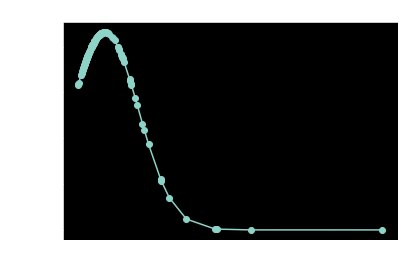

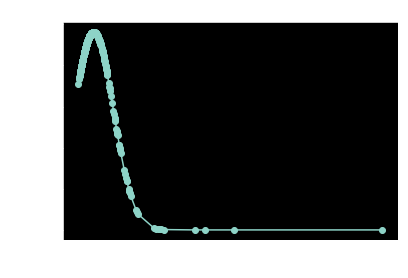

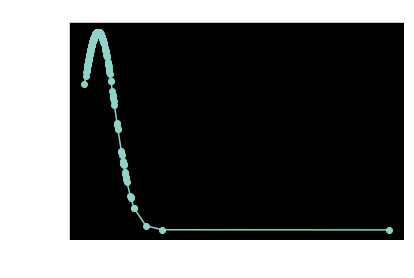

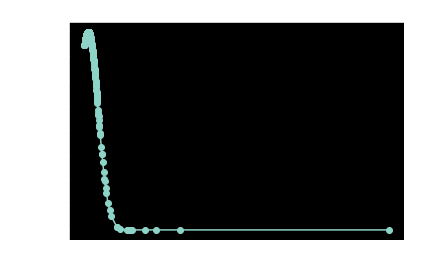

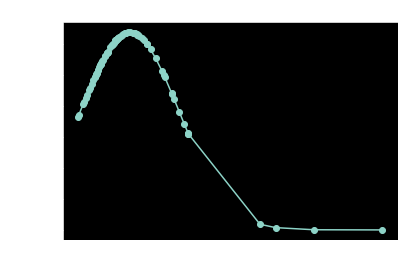

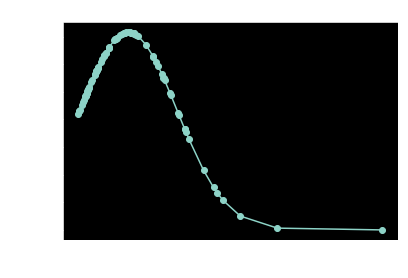

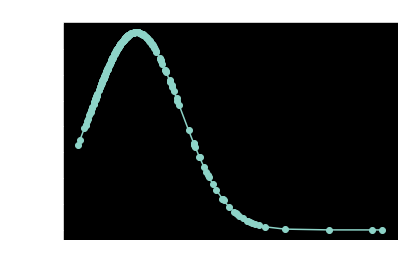

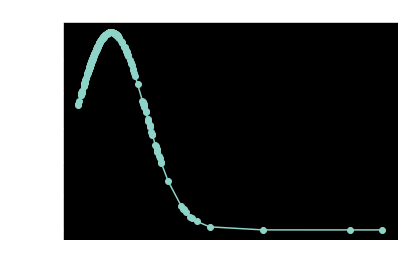

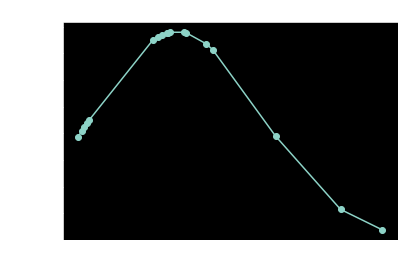

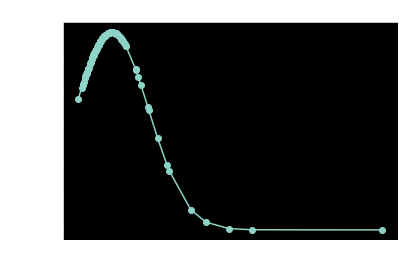

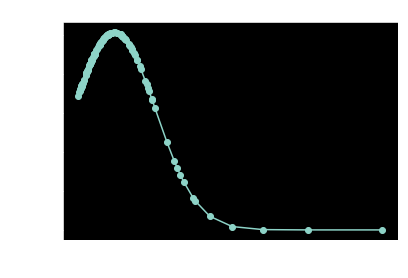

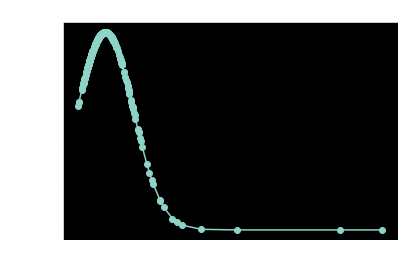

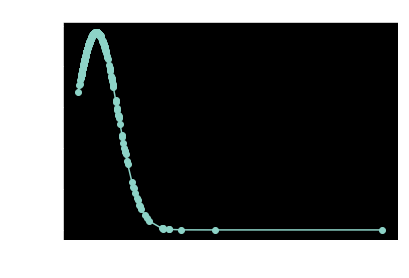

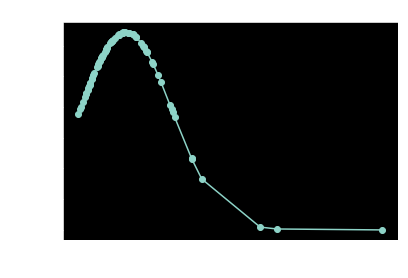

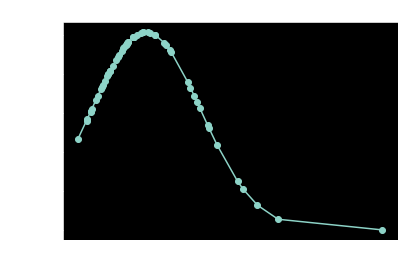

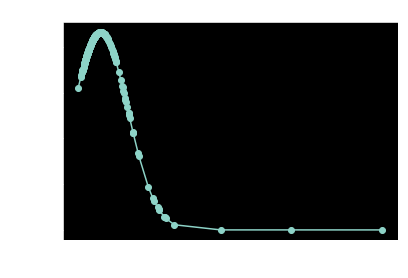

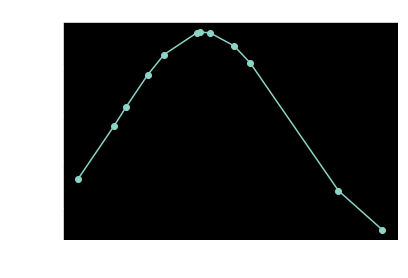

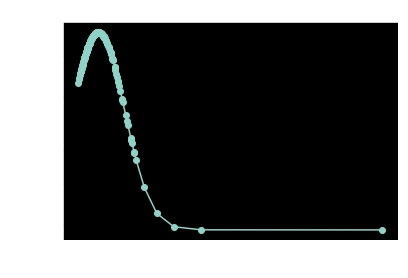

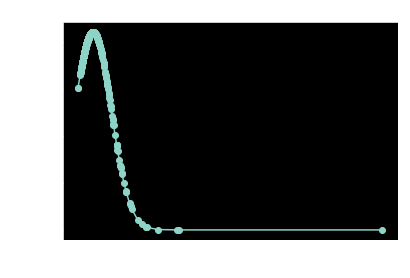

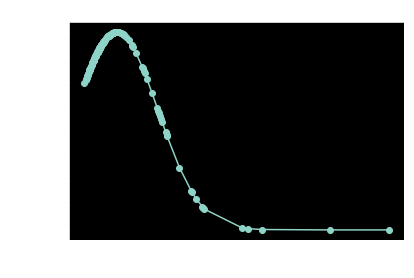

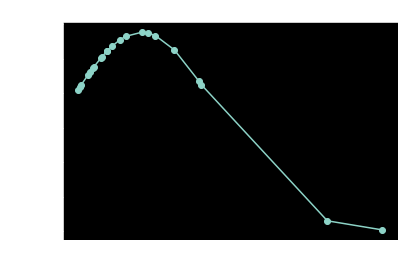

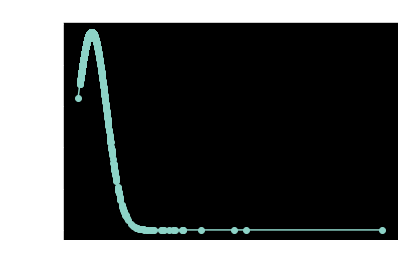

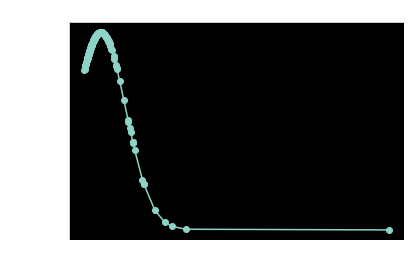

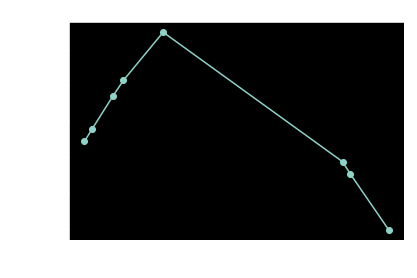

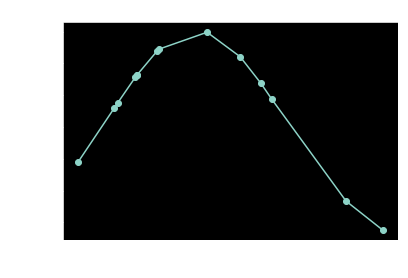

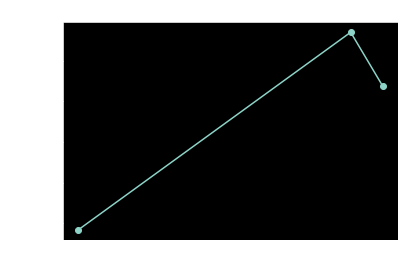

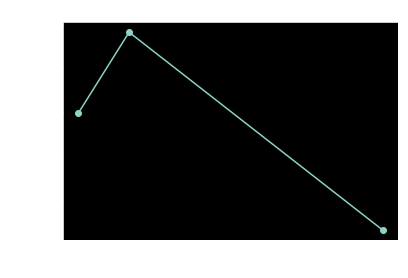

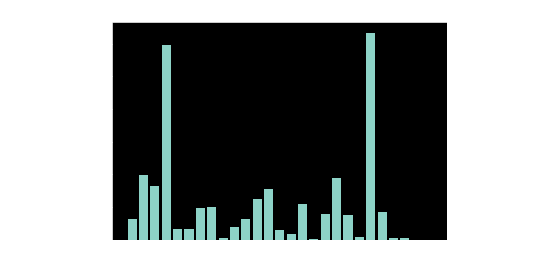

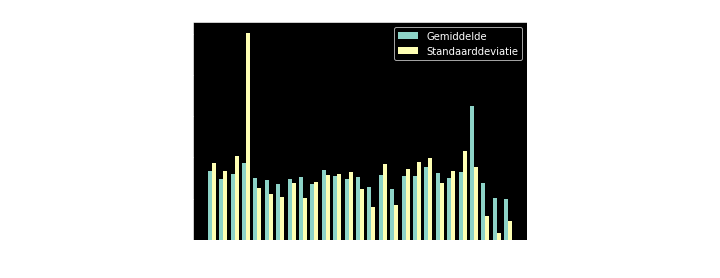

In [4]:
# %matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import re
import json


kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=naam,naamstemmen,verkozen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)
data = data["results"]

eindarray = list()

def search(letter):
       found = False
       for d in eindarray:
            if(letter in d.values()):
                return True
            else: 
                found = False
       return found

for x in data:
    if len(x["verkozen"]) >= 1:
        name = x["naam"][:1]
        if(search(name) == True):
            for y in eindarray:
                if(y["letter"] == name):
                    y["stemmen"].append(float(x["naamstemmen"]))
                    y["aantal"] +=1
                    
        else :
            thisdict = {
                "letter": name,
                "stemmen": [float(x["naamstemmen"])],
                "aantal" : 1,
                "std": 0
            }
            eindarray.append(thisdict)


eindarray = sorted(eindarray, key=lambda k: k['letter']) 
index = 0
for a in eindarray:
    plt.figure(index+1)
    a["std"] = np.std(a["stemmen"])
    
    a["stemmen"] = sorted(a["stemmen"])
    y = norm.pdf(a["stemmen"], np.mean(a["stemmen"]), a["std"])
    plt.plot(a["stemmen"],y, '-o')
    plt.xlabel("Aantal naamenstemmen voor de verkozen kandidaat")
    plt.ylabel("Kansdichtheid")

    plt.title("Gauss curve voor beginletter " + a["letter"].lower() + " van de achternaam")
    
    som = 0
    index +=1
    for x in a["stemmen"]:
        som += float(x)
    a["stemmen"] = som

plt.show()

x_as = list()
y_as = list()
aantal_as = list()
standaarddev = list()
for d in eindarray:
    x_as.append(str(d["letter"]))
    y_as.append(float(d["stemmen"]))
    aantal_as.append(d["aantal"])
    standaarddev.append(d["std"])


gemiddelde = list()

i = 0
for e in y_as:
    gemiddelde.append(e/aantal_as[i])
    i+=1




plt.xlabel("Eerste letter achternaam")
plt.ylabel("Totaal aantal stemmen")
plt.title("Totaal aantal stemmen per eerste letter van de achternaam voor de verkozen kandidaten")
plt.bar(x_as, y_as)
plt.show()


ax = plt.subplot(111)
N = len(x_as)
ind = np.arange(N) 

width = 0.35 

plt.bar(ind, gemiddelde, width, label='Gemiddelde')
plt.bar(ind + width, standaarddev, width,
    label='Standaarddeviatie')

plt.ylabel('Aantal stemmen')
plt.title('')
plt.xticks(ind + width / 2, x_as)
plt.xlabel("Eerste letter achternaam")
plt.title("Gemiddeld aantal stemmen en standaarddeviatie per eerste letter van de achternaam voor de verkozen kandidaten")
plt.legend(loc='best')
plt.show()

 


#Er is een verband tussen de eerste letter van de achternaam en het aantal stemmen voor de verkozen kandidaten
#Er is een verband tussen de eerste letter en het achternaam en het aantal stemmen dat nodig is om verkozen te geraken.


#Gemiddeld gezien hebben mesnen met achternaam dat start met Y meer stemmen nodig om verkozen te worden. 